# <b><center> Social Networks EDA </b></center>


## Entendimiento de los Datos:

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import re
from difflib import SequenceMatcher

## <u>Leer los datos que en el nombre contienen un mes:</u></br>

### <b>Instagram:</b>

Cargar los 12 archivos que en el nombre tienen un mes, en 3  DataFrames, uno de cada red social, donde cada uno de los cuales debe contener las siguientes columnas:

Instagram:
* Username
* Name
* Subscribers o Followers
* Country
* Authentic
* Engagement
* Category1
* Category2
* Month

In [76]:
ig_june = (
    pd.read_csv('DATA/instagramjune2022.csv')
    .assign(Month='June')
    .rename(columns={
        "instagram name": "username",
        "influencer name ":"name",
        "Category_1": "category1",
        "Category_2": "category2",
        "Subscribers count": "followers",
        "Views avg.": "country",
        "Likes avg": "authentic",
        "Comments avg.": "average",
        "Month": "month"})
)

In [77]:
ig_sep = (
    pd.read_csv('DATA/instagramsep2022.csv')
    .assign(Month='September')
    .rename(columns={
        "Instagram name": "username",
        " Name": "name",
        "Subscribers": "followers",
        "Audience country": "country",
        "Authentic engagement\n": "authentic",
        "Engagement average\r\n": "average",
        "Category_1": "category1",
        "Category_2": "category2",
        "Month": "month"})
    .drop('S.no', axis=1)
)

In [78]:
ig_nov = (
    pd.read_csv('DATA/instagramNov2022.csv')
    .assign(Month='November')
    .drop('s.no', axis=1)
    .rename(columns={
        "Name": "username",
        "Instagram Name": "name",
        "Category-1": "category1",
        "Followers": "followers",
        "\nCountry": "country",
        "Eng. (Auth.)": "authentic",
        "Eng. (Avg.)": "average",
        "Category-2": "category2",
        "Month": "month"})
)

In [79]:
ig_dec = (
    pd.read_csv('DATA/INSTAGRAMDEC2022.csv')
    .assign(Month='December')
    .rename(columns={
        "name": "username",
        "instagram name": "name",
        "Category_1": "category1",
        "Category_2": "category2",
        "Eng. (Auth.)": "authentic",
        "Eng. (Avg.)": "average",
        "Month": "month"})
)

Definiendo una función que transforma los números de texto a int en todo una columna

In [80]:
def text_int(column: pd.Series) -> pd.Series:
    return column.replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)

numeric_text_cols = ['followers', 'average', 'authentic']

In [81]:
ig_june = ig_june.dropna()
ig_june.loc[:, numeric_text_cols] = ig_june[numeric_text_cols].apply(text_int)
ig_sep.loc[:, numeric_text_cols] = ig_sep[numeric_text_cols].apply(text_int)
ig_nov.loc[:, numeric_text_cols] = ig_nov[numeric_text_cols].apply(text_int)
ig_dec.loc[:, numeric_text_cols] = ig_dec[numeric_text_cols].apply(text_int)

/tmp/ipykernel_1389/3133020300.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ig_dec.loc[:, numeric_text_cols] = ig_dec[numeric_text_cols].apply(text_int)


ig_months es la combinación de todos los meses, eliminando aquellos registros duplicados.
Tener cuidado con los datos numéricos, ya que son datos incompletos. Para sacar promedios se tiene que considerar los df por separado

In [82]:
ig_months = (
    pd.concat([ig_june, ig_sep, ig_nov, ig_dec], ignore_index=True)
    .drop("Rank", axis=1)
    .drop_duplicates()
)

Verificando duplicados

In [83]:
ig_months.duplicated().sum()

0

### TikTok:

In [84]:
tt_june = (
    pd.read_csv('DATA/tiktokjune2022.csv')
    .assign(Month='June')
    .rename(columns={
        "Tiktoker": "username",
        "influencer name":"name",
        "Subscribers count": "subs",
        "Views avg.": "views",
        "Likes avg": "likes",
        "Comments avg.": "comments",
        "Shares avg": "shares",
        "Month": "month"
    })
)
tt_june.head(1)

,username,name,subs,views,likes,comments,shares,month
0,___nicoichi___,NICO【平成フラミンゴ】,1.3M,1.9M,225.3K,1.7K,1.1K,June


In [85]:
tt_sep = (
    pd.read_csv('DATA/Tiktoksep2022.csv')
    .assign(Month='September')
    .rename(columns={
        "Tiktoker name": "name",
        "Tiktok name":"username",
        "Subscribers": "subs",
        "Views avg.": "views",
        "Likes avg.": "likes",
        "Comments avg.": "comments",
        "Shares avg.": "shares",
        "Month": "month"
    })
    .drop("S.no", axis=1)
)
tt_sep.head(1)

,name,username,subs,views,likes,comments,shares,month
0,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K,September


In [86]:
tt_nov = (
    pd.read_csv('DATA/tiktoknov2022.csv')
    .assign(Month='November')
    .rename(columns={
        "Tiktoker name": "name",
        "Tiktok name":"username",
        "\nFollowers": "subs",
        "Views (Avg.)": "views",
        "Likes (Avg.)": "likes",
        "Comments (Avg.)": "comments",
        "Shares (Avg.)": "shares",
        "Month": "month"
    })
    .drop("row-cell", axis=1)
    .drop(0)
)
tt_nov.head(1)

,name,username,subs,views,likes,comments,shares,month
1,yossikramer,Yossi,145.6K,26.8M,2.2M,30.1K,71.2K,November


In [87]:
tt_dec = (
    pd.read_csv('DATA/TIKTOKDEC2022.csv')
    .assign(Month='December')
    .rename(columns={
        "Tiktoker name": "name",
        "Tiktok name":"username",
        "followers": "subs",
        "views(avg)": "views",
        "likes(avg.)": "likes",
        "comments(avg.)": "comments",
        "shares(avg.)": "shares",
        "Month": "month"
    })
    .drop("Rank", axis=1)
)
tt_dec.head(1)

,name,username,subs,views,likes,comments,shares,month
0,mrbeast,MrBeast,60.3M,29.2M,3.5M,30.8K,7.2K,December


In [88]:
def text_int_tt(column: pd.Series) -> pd.Series:
    return column.replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)

numeric_text_cols = ['subs', 'views', 'likes', 'comments', 'shares']

In [89]:
tt_june = tt_june.dropna()
tt_june.loc[:, numeric_text_cols] = tt_june[numeric_text_cols].apply(text_int_tt)
tt_sep.loc[:, numeric_text_cols] = tt_sep[numeric_text_cols].apply(text_int_tt)
tt_nov.loc[:, numeric_text_cols] = tt_nov[numeric_text_cols].apply(text_int_tt)
tt_dec.loc[:, numeric_text_cols] = tt_dec[numeric_text_cols].apply(text_int_tt)

In [91]:
tt_months = (
    pd.concat([tt_june, tt_sep, tt_nov, tt_dec], ignore_index=True)
    .drop_duplicates()
)

tt_months.head(3)

,username,name,subs,views,likes,comments,shares,month
0,___nicoichi___,NICO【平成フラミンゴ】,1300000,1900000,225300,1700,1100,June
1,_.anime.edits_0,video,97000,1700000,75600,1500,8700,June
2,_.respect.boss._,Respect compilation 🤝🥶,1500000,4400000,241900,249,797,June


### Youtube:

In [145]:
y_june = (
    pd.read_csv('DATA/youtubejune2022.csv')
    .assign(Month='June')
    .rename(columns={
        "channel name": "username",
        "youTuber":"name",
        "Category": "category1",
        "Category_2": "category2",
        "Subscribers count": "subs",
        "Country": "country",
        "Views avg.": "views",
        "Likes avg": "likes",
        "Comments avg.": "comments",
        "Month": "month"
    })
    .dropna()
)
y_june.head(11)

,username,name,category1,category2,subs,country,views,likes,comments,month
1,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",Animation,Toys,10.6M,-,348.5,3,N/A',June
3,Blippi - Educational Videos for Kids,Blippi - Educational Videos for Kids,Education,Toys,15.7M,-,1.2M,4.2K,N/A',June
14,Трум Трум,Трум Трум,Humor,Toys,13.7M,-,103.2K,1.8K,83,June
15,dangmattsmith,Dang Matt Smith,Animation,Humor,13.7M,-,103.5K,4.4K,332,June
18,DuDuPopTOY,DuDuPopTOY,Animation,Humor,10.5M,-,11.1K,109,N/A',June
19,✿ Kids Diana Show,✿ Kids Diana Show,Animation,Toys,96.6M,-,11.4M,40.9K,N/A',June
25,Super Senya,Super Senya,Animation,Toys,14.7M,-,12.4K,100,N/A',June
37,Emily Tube,Emily Tube,Animation,Toys,11M,-,16.1K,55,N/A',June
48,Masha and The Bear,Masha and The Bear,Animation,Toys,34.1M,-,1M,6.6K,N/A',June
49,PinkPanther,Official Pink Panther,Movies,Animation,18.1M,-,1M,6.9K,N/A',June


In [144]:
y_sep = (
    pd.read_csv('DATA/Youtubesep2022.csv')
    .assign(Month='September')
    .rename(columns={
        "Name": "username",
        "Youtuber":"name",
        "Category_2": "category2",
        " Subscribers": "subs",
        "Country": "country",
        "Avg. views\r\n": "views",
        "Avg. likes": "likes",
        "Avg Comments": "comments",
        "Category_3": "category3",
        "Month": "month"
    })
    .drop("S.no", axis=1)
    .dropna()
)
y_sep.head(1)

,username,name,country,subs,category2,views,likes,comments,category3,month
3,MrBeast,MrBeast6000,United States,104.1M,Video games,44.8M,2.2M,70.9K,Humor,September


In [143]:
y_nov = (
    pd.read_csv('DATA/youtubenov2022.csv')
    .assign(Month='November')
    .rename(columns={
        "Youtube channel": "username",
        "youtuber name":"name",
        "Category": "category1",
        "Followers": "subs",
        "Country": "country",
        "\nViews (Avg.)": "views",
        "Likes (Avg.)": "likes",
        "Comments (Avg.)": "comments",
        "Category-2": "category2",
        "Month": "month"
    })
    .drop("s.no", axis=1)
    .dropna()
)
y_nov.head(1)

,username,name,category1,subs,country,views,likes,comments,category2,month
3,MrBeast6000,MrBeast,Video games,109.1M,United States,38.4M,3.1M,56.7K,Humor,November


In [142]:
y_dec= pd.read_csv('DATA/YOUTUBEDEC2022.csv')
y_dec = (
    pd.read_csv('DATA/YOUTUBEDEC2022.csv')
    .assign(Month='December')
    .rename(columns={
        "Youtube channel": "username",
        "youtuber name":"name",
        "Category": "category1",
        "Followers": "subs",
        "Country": "country",
        "\nViews (Avg.)": "views",
        "Likes (Avg.)": "likes",
        "Comments (Avg.)": "comments",
        "Category-2": "category2",
        "Month": "month"
    })
    .drop("s.no", axis=1)
    .dropna()
)
y_dec.head(1)

,username,name,category1,subs,country,views,likes,comments,category2,month
3,MrBeast,MrBeast,Video games,117M,United States,68.5M,2.9M,99.9K,Humor,December


In [146]:
def text_int_y(column: pd.Series) -> pd.Series:
    return column.replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)

numeric_text_cols = ['subs', 'views', 'likes', 'comments']

In [148]:
y_june = y_june.dropna()
y_june.loc[:, numeric_text_cols] = y_june[numeric_text_cols].apply(text_int_y)
y_sep.loc[:, numeric_text_cols] = y_sep[numeric_text_cols].apply(text_int_y)
y_nov.loc[:, numeric_text_cols] = y_nov[numeric_text_cols].apply(text_int_y)
y_dec.loc[:, numeric_text_cols] = y_dec[numeric_text_cols].apply(text_int_y)

SyntaxError: unterminated string literal (detected at line 1) (<unknown>, line 1)

In [91]:
tt_months = (
    pd.concat([tt_june, tt_sep, tt_nov, tt_dec], ignore_index=True)
    .drop_duplicates()
)

tt_months.head(3)

,username,name,subs,views,likes,comments,shares,month
0,___nicoichi___,NICO【平成フラミンゴ】,1300000,1900000,225300,1700,1100,June
1,_.anime.edits_0,video,97000,1700000,75600,1500,8700,June
2,_.respect.boss._,Respect compilation 🤝🥶,1500000,4400000,241900,249,797,June


Youtube:
* Username
* Name
* Country
* Suscribers o Folowers
* Views
* Likes
* Comments
* Category1
* Category2
* Month

# Análisis instagram

### Número total de cuentas distintas en instagram: 1313

In [97]:
ig_months.username.drop_duplicates().size

1313

### Media de seguidores
Calcular el promedio de seguidores, authentic, engagement, de cada cuenta. Es decir, cada red social cuenta con 4 archivos de 4 meses distintos, si una cuenta aparece en los 4 meses, debera calcular el promedio de esos 4 meses, si una cuenta solo aparece 2 meses, se hara el promedio de esos dos meses y asi sucesivamente. SI el valor es nulo, vacio, N/A, o 0 no se debe promediar.

In [98]:
ig_means = (
    ig_months
    .groupby('username')
     # aggregate functiosn skips nan by deffault
    .aggregate({
        'followers': 'mean',
        'authentic': 'mean',
        'average': 'mean'
    })    
    .reset_index()
    .sort_values('followers', ascending=False)
)

### Metricas de Valor

Metricas de Valor de cada cuenta. Para este punto debe utilizar los promedios del punto anterior: Promedio Engagement/Promedio Followers.

In [99]:
ig_means['engagement_ratio'] = ig_means.average / ig_means.followers

### Graficar iniciales

Graficar en un histograma el numero de cuentas que inicien por cada letra del alfabeto (Mayusculas y minusculas son tomadas de igual forma) y agrupar en una sola categoria todos los que no comiencen con una letra del alfabeto.

In [101]:
def get_inicial(name: str) -> str:
    name = str(name)
    first_is_letter = re.search(r'^[a-zA-Z]', name)
    if first_is_letter:
        return name[0].upper()
    else:
        return 'other'


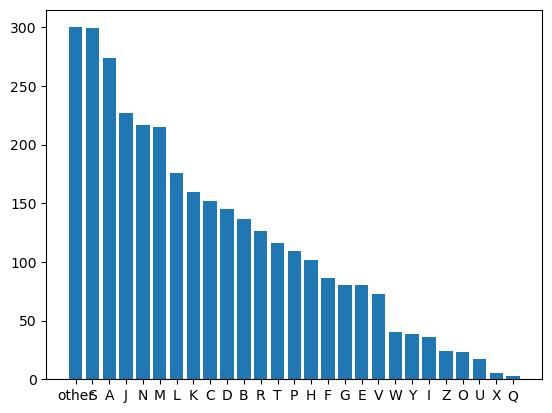

In [103]:
initials = (
    ig_months.name
    .map(get_inicial)
    .value_counts()
    .reset_index(name='frequency')
    .rename(columns={
        'index': 'letter',
        'name': 'letter'
    })
)
plt.bar(initials.letter, initials.frequency)
plt.show()

### ¿Cual es la cuenta de IG con mas caracteres en su nombre?

In [107]:
name_len = (
    ig_months[['name', 'username']]
    .assign(len_name = ig_months.name.map(lambda x: len(str(x))))
    .assign(len_username = ig_months.username.map(lambda x: len(str(x))))
)
ids1 = name_len.loc[name_len.len_name.idxmax()]
ids2 = name_len.loc[name_len.len_username.idxmax()]

**username**

In [108]:
ids2

name                  JUNGKOOK (전정국) Updates
username        jungkook_bighitentertainment
len_name                                  22
len_username                              28
Name: 124, dtype: object

**name**

In [109]:
ids1

name            ＡＲＡＩＫ  ＧＡＬＳＴＹＡＮ ＷＯＲＬＤ ＦＬＯＲＩＳＴ  ＤＥＳＩＧＮＥＲ
username                      araikgalstyanmoscowschool
len_name                                             39
len_username                                         25
Name: 3078, dtype: object

### ¿Cuantas cuentas de Instagram tienen ya sea en su username o name las letras de las iniciales del primer nombre de cada uno de los integrantes de tu equipo?

In [121]:
(ig_months.name.str.contains(r'[GgIiMm]') | ig_months.name.str.contains(r'[GgIiMm]')).sum()

2336

## <u>Leer los datos que en el nombre no contienen mes (resumen):</u></br>

In [ ]:
ig_resumen = pd.read_csv('DATA/instagram.csv')
ig_resumen

In [ ]:
tiktok_resumen = pd.read_csv('DATA/tiktok.csv')
tiktok_resumen

In [ ]:
youtube_resumen = pd.read_csv('DATA/youtube.csv')
youtube_resumen

# Análisis tiktok

In [58]:
tt_months.username.drop_duplicates().size

3055

### Tenemos 3055 cuentas únicas en nuestros registros de tiktok

### Medias de followers, views, likes, comments y shares de cada cuenta

In [67]:
tt_means = (
    tt_months
    .groupby('username')
     # aggregate functiosn skips nan by deffault
    .aggregate({
        'subs': 'mean',
        'views': 'mean',
        'likes': 'mean',
        'comments': 'mean',
        'shares': 'mean'
    })    
    .reset_index()
    .sort_values('subs', ascending=False)
)

### Métricas de valor

In [69]:
tt_means['views_ratio'] = tt_means.views / tt_means.subs
tt_means['likes_ratio'] = tt_means.likes / tt_means.subs
tt_means['comments_ratio'] = tt_means.comments / tt_means.subs
tt_means['share_ratio'] = tt_means.shares / tt_means.subs

In [70]:
tt_means

,username,subs,views,likes,comments,shares,views_ratio,likes_ratio,comments_ratio,share_ratio
815,Khabane lame,1.514333e+08,1.430000e+07,1.766667e+06,14166.666667,4733.333333,0.094431,0.011666,0.000094,0.000031
1803,charli d’amelio,1.478667e+08,1.053333e+07,7.970667e+05,12466.666667,3366.666667,0.071235,0.005390,0.000084,0.000023
2215,khaby.lame,1.432000e+08,2.530000e+07,2.900000e+06,23500.000000,16300.000000,0.176676,0.020251,0.000164,0.000114
187,Bella Poarch,9.200000e+07,6.700000e+06,5.797500e+05,4850.000000,1300.000000,0.072826,0.006302,0.000053,0.000014
1716,bellapoarch,9.020000e+07,6.800000e+06,9.219000e+05,9500.000000,1200.000000,0.075388,0.010221,0.000105,0.000013
...,...,...,...,...,...,...,...,...,...,...
2735,tedwards,5.100000e+03,9.433000e+05,1.896000e+05,1900.000000,3100.000000,184.960784,37.176471,0.372549,0.607843
2177,juliaaliceaa,3.700000e+03,2.200000e+06,5.503000e+05,3100.000000,14300.000000,594.594595,148.729730,0.837838,3.864865
1634,alexbatistao,3.200000e+03,9.517000e+05,4.660000e+04,1700.000000,19400.000000,297.406250,14.562500,0.531250,6.062500
1671,apollolikesblu,3.000000e+03,7.023000e+05,1.245000e+05,9500.000000,2100.000000,234.100000,41.500000,3.166667,0.700000


### Gráficas

Grafica del numero de cuentas ue inicien por cada letra del alfabeto y agrupar en una categoría todos los que no comiencen con una letra del alfabeto

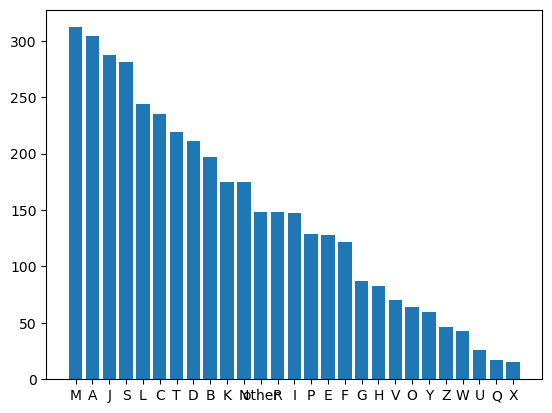

In [105]:
initials = (
    tt_months.name
    .map(get_inicial)
    .value_counts()
    .reset_index(name='frequency')
    .rename(columns={
        'index': 'letter',
        'name': 'letter'
    })
)
plt.bar(initials.letter, initials.frequency)
plt.show()

### Cuál es la cuenta de tiktok con más caracteres en su nombre?

In [113]:
name_len = (
    tt_months[['name', 'username']]
    .assign(len_name = tt_months.name.map(lambda x: len(str(x))))
    .assign(len_username = tt_months.username.map(lambda x: len(str(x))))
)
tds1 = name_len.loc[name_len.len_name.idxmax()]
tds2 = name_len.loc[name_len.len_username.idxmax()]

In [114]:
tds2

name                               spriteder_spd
username        Prite Netijen Netirattanapaiboon
len_name                                      13
len_username                                  32
Name: 1499, dtype: object

In [116]:
tds1

name            بيسان اسماعيل - Bessan Ismail
username                        bessan_esmail
len_name                                   29
len_username                               13
Name: 116, dtype: object

### Cuántas cuentas de tiktok tienen le nombre del aguno de estos animales: perro, gato, leon tigre?

In [120]:
(tt_months.username.str.contains(r'^(perro|gato|leon|tigre)$') | tt_months.username.str.contains(r'^(perro|gato|leon|tigre)$')).sum()

/tmp/ipykernel_1389/3064001155.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (tt_months.username.str.contains(r'^(perro|gato|leon|tigre)$') | tt_months.username.str.contains(r'^(perro|gato|leon|tigre)$')).sum()


0